Get andrew vlasic's paper.Use his dataset and plot ruggedness

In [1]:
from itertools import permutations,combinations
from math import perm as n_perm, comb as n_comb
import kagglehub
from kagglehub import KaggleDatasetAdapter
#FIXME implement these methods from scratch, cache probs
from infomeasure import mutual_information as mi, conditional_mutual_information as cmi
from tqdm import tqdm
import numpy as np
SEED = 1


/home/daavid/PycharmProjects/ising/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
np.seed(SEED)

In [ ]:
# Set the path to the file you'd like to load
file_path = "Participants_Data_WH18/Train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arbazkhan971/anomaly-detection",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


/tmp/ipykernel_629257/2387679091.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 81.5k/81.5k [00:00<00:00, 3.25MB/s]

Extracting zip of Train.csv...


First 5 records:    feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0        100        160     1.6000          0          0          0   
1         20         83     4.1500          1          0          0   
2         99        150     1.5151          1          0          0   
3         40         40     1.0000          0          0          0   
4         12        234    19.5000          1          0          0   

   feature_7  feature_8  feature_9  feature_10  ...  feature_1550  \
0          0          0          0           0  ...             0   
1          0          0          0           1  ...             0   
2          0          0          0           0  ...             0   
3          0          0          0           0  ...             0   
4          0          0          0           0  ...             0   

   feature_1551  feature_1552  feature_1553  feature_1554  feature_1555  \
0             0             0             0             0         

In [8]:
df["Class"].value_counts()

Class
0    1620
1     143
Name: count, dtype: int64

In [15]:
df.drop(columns="Class").isna().any(axis=None)

np.False_

In [16]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Frequency'>

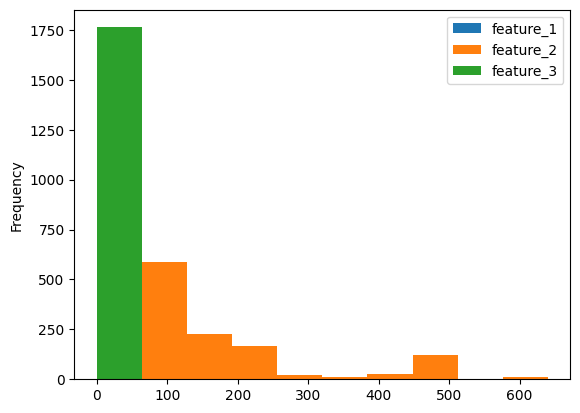

In [ ]:
df[[col for col in df.columns][:3]].plot.hist()

<Axes: ylabel='Frequency'>

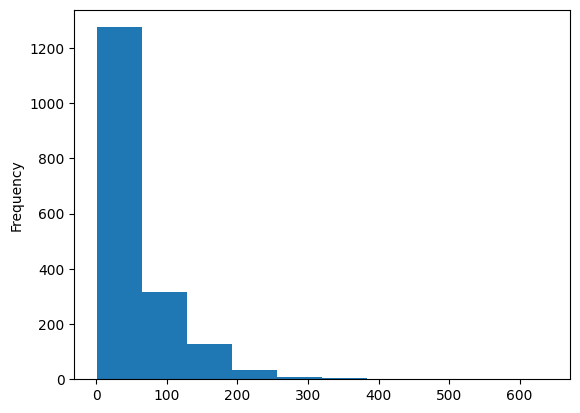

In [27]:
df["feature_1"].plot.hist()

<Axes: ylabel='Count'>

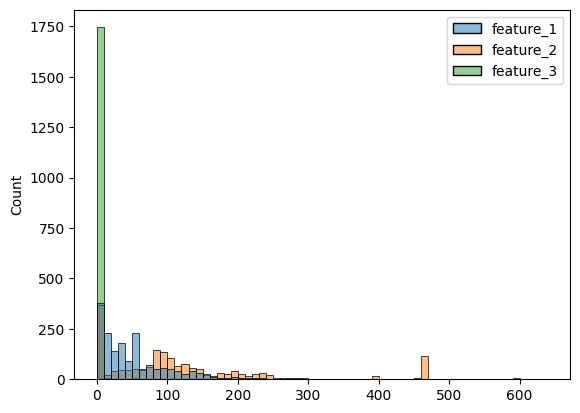

In [28]:
import seaborn as sns 
sns.histplot(df[[col for col in df.columns][:3]])

In [ ]:
#TODO try different kernels, bandwidths
kwargs = dict(approach="kernel", bandwidth=0.8, kernel="box", workers=-1)

In [ ]:
from tqdm import tqdm
mi_y = {}
X = df.drop(columns="Class")
y = df["Class"]

for col in tqdm(X.columns):
    mi_y[col] = mi(X[col],y,**kwargs)



  0%|          | 0/1558 [00:00<?, ?it/s]

100%|██████████| 1558/1558 [00:20<00:00, 76.25it/s]


In [61]:
#MI is symmetric. Also, the BQM will add symmetric pairs and store it under a single key
col_pairs = combinations(X.columns,2)
unique_info = {}
redundancy = {}
tot = n_comb(len(X.columns),2)
for pair in tqdm(col_pairs,total=tot):
    col1,col2 = pair
    unique_info[pair] = cmi(df[col1], y, cond=df[col2],**kwargs)
    redundancy[pair] = cmi(df[col1],df[col2],cond=y,**kwargs)




100%|██████████| 1212903/1212903 [8:09:12<00:00, 41.32it/s]  


In [74]:
unique_info_lines = [{"features": [k[0],k[1]], "unique_info": round(float(v),8)} for k,v in tqdm(unique_info.items())]
redundancy_lines = [{"features": [k[0],k[1]], "redundancy": round(float(v),8)} for k,v in tqdm(redundancy.items())]

100%|██████████| 1212903/1212903 [00:03<00:00, 320435.58it/s]


In [3]:
import json
import os
save_path = "./data"
if not os.path.exists(save_path):
    os.makedirs(save_path,exist_ok=True)

file_path = os.path.join(save_path, "miy_unique_redund.json")
if os.path.exists(file_path):
    with open(file_path,"r") as f:
        miy_unique_redund = json.load(f)
else:
    miy_unique_redund = {"mi_y": mi_y, "unique_info": unique_info_lines,"redundancy": redundancy_lines}
    with open(os.path.join(save_path, "miy_unique_redund.json"),"w") as f:
        json.dump(miy_unique_redund,f)

In [21]:
#TODO build a few different BQMS
from dimod import BinaryQuadraticModel as BQM, BINARY

from tqdm import tqdm
bqm = BQM(BINARY)
for feature, mi_score in tqdm(miy_unique_redund["mi_y"].items()):
    #negative because high mi score is good
    bqm.add_linear(v=feature,bias=-mi_score)

for dct in tqdm(miy_unique_redund["redundancy"]):
    (feature1,feature2) = dct["features"]
    bqm.add_interaction(feature1,feature2,dct["redundancy"])

norm_scale = bqm.normalize()
norm_scale

100%|██████████| 1212903/1212903 [00:03<00:00, 317765.08it/s]


np.float64(0.3407818778086092)

In [22]:
bqm.quadratic[(feature1,feature2)]

np.float64(0.0006897527441409592)

In [5]:
import neal
def run_sim(bqm,num_reads=1):
    sampler = neal.SimulatedAnnealingSampler()
    sampleset = sampler.sample(bqm,num_reads=num_reads,seed=SEED)
    sampleset_df = sampleset.aggregate().to_pandas_dataframe()
    return sampleset_df

In [7]:
sampleset_df = run_sim(bqm,num_reads=1)
sampleset_df

,feature_1,feature_10,feature_100,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,...,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,energy,num_occurrences
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.359979e-10,1


In [23]:
sampleset_df_4000 = run_sim(bqm,num_reads=4000)

In [24]:
len(sampleset_df_4000)

4000

In [25]:
sampleset_df_4000.sort_values("energy")

,feature_1,feature_10,feature_100,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,...,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,energy,num_occurrences
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.030532,1
1289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.027402,1
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.027353,1
411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.027293,1
1778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.027269,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.018478,1
2767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.018385,1
3110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.018346,1
1347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.018280,1


<Axes: xlabel='num_occurrences', ylabel='energy'>

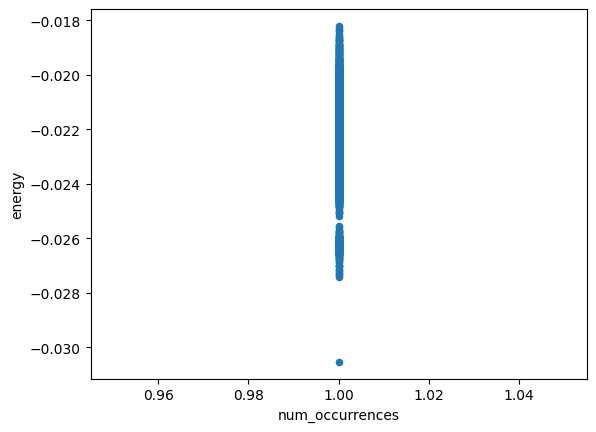

In [26]:
sampleset_df_4000.plot.scatter("num_occurrences","energy")

In [ ]:
def get_selected_features(sampleset_df):
    sampleset_df

In [27]:
sampleset_df_4000[sampleset_df_4000.energy == sampleset_df_4000.energy.min()]

,feature_1,feature_10,feature_100,feature_1000,feature_1001,feature_1002,feature_1003,feature_1004,feature_1005,feature_1006,...,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,energy,num_occurrences
792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.030532,1


In [ ]:
sampleset_df_5000.ilocsampleset_df_5000.energy.idxmin()

0

In [30]:
import multiprocessing as mp
from functools import partial
import dimod


def _neal_worker(bqm, reads, seed, kwargs):
    """Runs a chunk of SA reads in a subprocess."""
    sampler = neal.SimulatedAnnealingSampler()
    return sampler.sample(bqm, num_reads=reads, seed=seed, **kwargs)


def parallel_neal(bqm, num_reads=1000, num_workers=None, base_seed=None, **kwargs):
    """
    Parallel wrapper for dwave-neal (multiprocessing).  
    Splits num_reads across workers, runs in parallel, and merges SampleSets.
    
    Args:
        bqm: dimod.BinaryQuadraticModel
        num_reads: total reads to perform across workers
        num_workers: CPU cores to use (default: all available)
        base_seed: optional base seed for deterministic runs
        **kwargs: passed directly to sampler.sample()
    """
    if num_workers is None:
        num_workers = mp.cpu_count()

    # How many reads each worker should do
    reads_per_worker = [num_reads // num_workers] * num_workers
    for i in range(num_reads % num_workers):
        reads_per_worker[i] += 1

    # Seeds per worker (optional deterministic behavior)
    if base_seed is not None:
        worker_seeds = [base_seed + i for i in range(num_workers)]
    else:
        worker_seeds = [None] * num_workers

    with mp.Pool(processes=num_workers) as pool:
        results = pool.starmap(
            _neal_worker,
            [(bqm, reads_per_worker[i], worker_seeds[i], kwargs)
             for i in range(num_workers)]
        )

    # Merge all SampleSets
    return dimod.concatenate(results)



sampleset = parallel_neal(
    bqm,
    num_reads=5000,
    num_workers=4,
    base_seed=1,
    #sweeps=2000,
    #beta_range=(0.1, 3.0)
)

print(sampleset)
print("Best energy:", sampleset.first.energy)


     feature_1 feature_10 feature_100 ... feature_999    energy num_oc.
2117         0          0           0 ...           0 -0.029378       1
4613         0          0           0 ...           0 -0.027418       1
2914         0          0           0 ...           0 -0.027402       1
108          0          0           0 ...           0 -0.027386       1
2484         0          0           0 ...           0 -0.027385       1
1164         0          0           0 ...           0 -0.027324       1
2179         0          0           0 ...           0 -0.027318       1
3958         0          0           0 ...           0 -0.027292       1
283          0          0           0 ...           0 -0.027252       1
3091         0          0           0 ...           0  -0.02724       1
1704         0          0           0 ...           0 -0.027186       1
1443         0          0           0 ...           0 -0.027115       1
3775         0          0           0 ...           0 -0.027112 

Frustration happens when there are multiple conditions that can't be simultaneously satisfied. 

For instance, in an Ising hamiltonian  $E = -J_{(1,2)}s_1s_2 - J_{(1,3)}s_1s_3 - J_{(2,3)}s_2s_3$

with $J_{(1,2)} > 0$ and  $J_{(2,3)} > 0$, these couplings favor aligned (same sign) spins (Ferromagnetic)

and with $J_{(1,3)} < 0$, the coupling prefers anti-aligned spins (antiferromagnetic)

However if we fix $s_1$ and $s_3$ to have the same spins as $s_2$ (to satisfy $J_{(1,2)}$ and $J_{(2,3)}$), then they necessarily will have the same spin as each other and so cannot satisfy $J_{(1,3)}$

Prove: If a cycle $J_{(i,j)}...J_{(k,i)}$ is such that the product of the Js is negative, then the cycle is frustrated

Where we define a frustrated coupling to be one in which the spins are of a different sign than J.